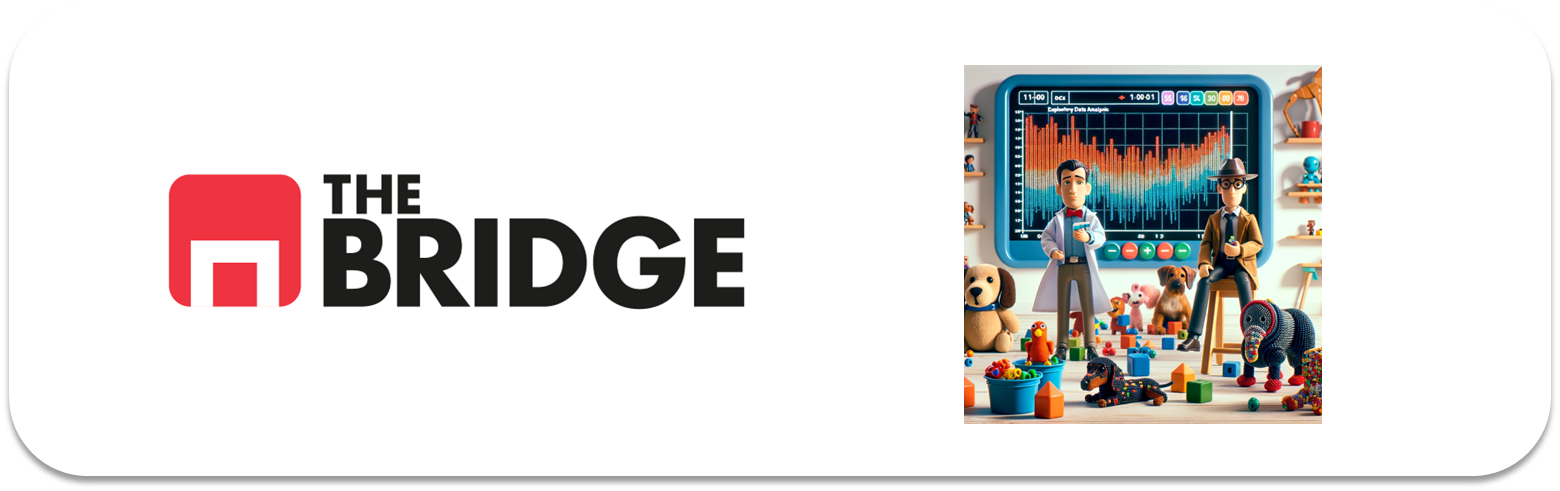

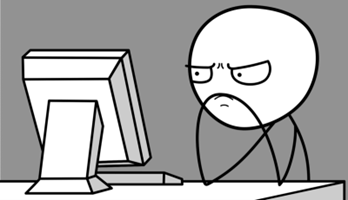

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

In [10]:
import pandas as pd

# Cargar el dataset de admisiones
file_path = "./data/admission_data.csv"
admissions_df = pd.read_csv(file_path)

# Convertir 'Admission' a variable binaria (1 = Admitted, 0 = Rejected)
admissions_df['Admission'] = admissions_df['Admission'].map({'Admitted': 1, 'Rejected': 0})

# Inspeccionar las columnas y primeros datos
print("Columnas disponibles:")
print(admissions_df.columns)
print("\nPrimeras filas del dataset:")
print(admissions_df.head())




Columnas disponibles:
Index(['Unnamed: 0', 'Year', 'Major', 'Gender', 'Admission'], dtype='object')

Primeras filas del dataset:
   Unnamed: 0  Year                    Major Gender  Admission
0           0  1973       School of Medicine      F        0.0
1           1  1973  Department of Economics      M        NaN
2           2  1973                    Other      F        NaN
3           3  1973                    Other      M        NaN
4           4  1973                    Other      M        0.0


In [13]:
# Modelo con interacción
interaction_model = smf.logit('Admission ~ C(Major) * C(Gender)', data=admissions_df).fit()

# Resumen del modelo con interacción
print(interaction_model.summary())


c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

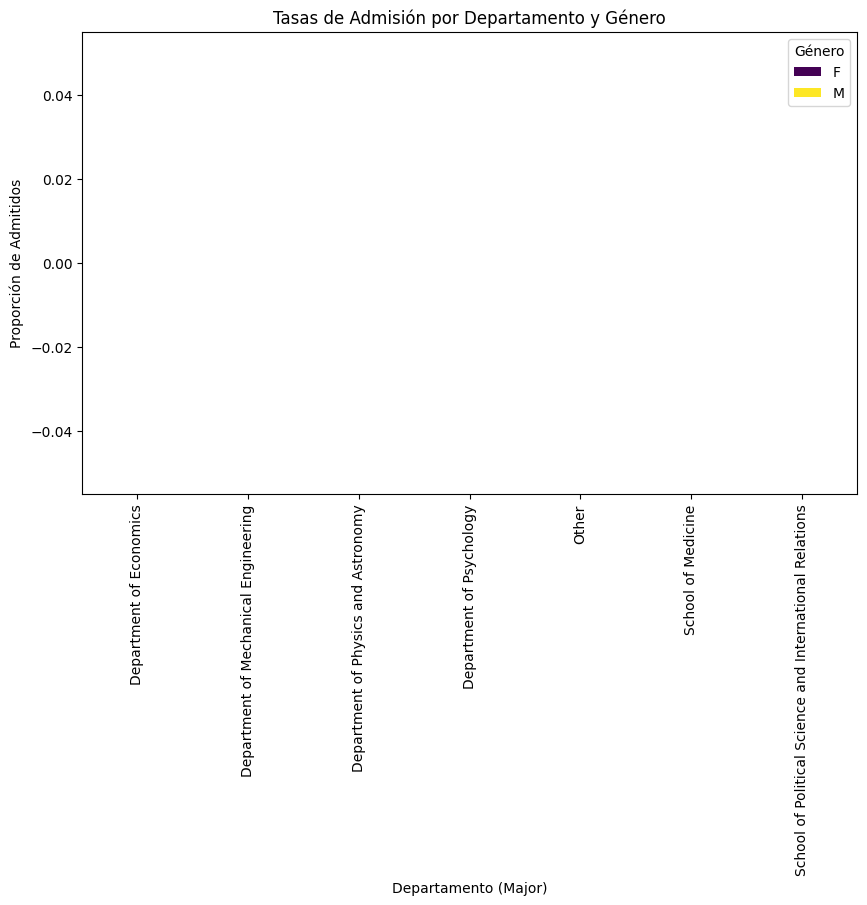

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular tasas de admisión por departamento y género
admission_rates = admissions_df.groupby(['Major', 'Gender'])['Admission'].mean().unstack()

# Graficar tasas de admisión
admission_rates.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Tasas de Admisión por Departamento y Género")
plt.ylabel("Proporción de Admitidos")
plt.xlabel("Departamento (Major)")
plt.legend(title="Género")
plt.show()


Tabla de contingencia:
Gender                                                 F     M
Major                                                         
Department of Economics                               25   560
Department of Mechanical Engineering                 375   417
Department of Physics and Astronomy                  108  1138
Department of Psychology                             341   373
Other                                               2486  5438
School of Medicine                                   593   325
School of Political Science and International R...   393   191


c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction de

         Current function value: 0.000000
         Iterations: 35

Resumen del modelo sin interacción:


c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction de

                           Logit Regression Results                           
Dep. Variable:              Admission   No. Observations:                 7531
Model:                          Logit   Df Residuals:                     7523
Method:                           MLE   Df Model:                            7
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                     inf
Time:                        00:20:36   Log-Likelihood:            -1.3015e-07
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             -25.5003   2.24e+04     -0

c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35

Error ajustando el modelo con interacción: Singular matrix


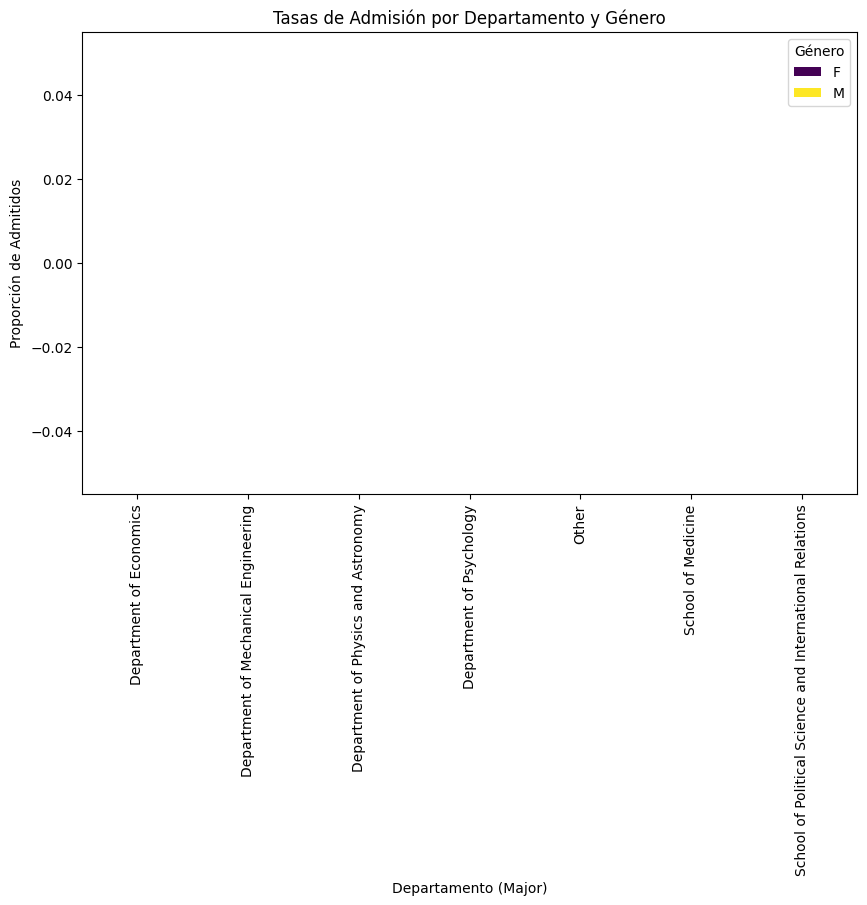

In [14]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset y preparar los datos
file_path = "./data/admission_data.csv"
admissions_df = pd.read_csv(file_path)

# Convertir 'Admission' a variable binaria (1 = Admitted, 0 = Rejected)
admissions_df['Admission'] = admissions_df['Admission'].map({'Admitted': 1, 'Rejected': 0})

# Crear una tabla de contingencia para verificar combinaciones de 'Major' y 'Gender'
contingency_table = pd.crosstab(admissions_df['Major'], admissions_df['Gender'])
print("Tabla de contingencia:")
print(contingency_table)

# Filtrar combinaciones válidas (eliminar combinaciones con datos insuficientes)
valid_combinations = admissions_df.groupby(['Major', 'Gender']).size().reset_index(name='count')
valid_combinations = valid_combinations[valid_combinations['count'] > 0]
admissions_df_filtered = admissions_df.merge(valid_combinations[['Major', 'Gender']], on=['Major', 'Gender'])

# Paso 2: Ajustar el modelo de regresión logística sin interacción
model = smf.logit('Admission ~ C(Major) + C(Gender)', data=admissions_df_filtered).fit()
print("\nResumen del modelo sin interacción:")
print(model.summary())

# Paso 3: Ajustar el modelo con interacción (opcional, si no hay problemas de singularidad)
try:
    interaction_model = smf.logit('Admission ~ C(Major) * C(Gender)', data=admissions_df_filtered).fit()
    print("\nResumen del modelo con interacción:")
    print(interaction_model.summary())
except Exception as e:
    print(f"\nError ajustando el modelo con interacción: {e}")

# Paso 4: Visualización de tasas de admisión
# Calcular tasas de admisión por 'Major' y 'Gender'
admission_rates = admissions_df_filtered.groupby(['Major', 'Gender'])['Admission'].mean().unstack()

# Crear gráfico de barras
admission_rates.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Tasas de Admisión por Departamento y Género")
plt.ylabel("Proporción de Admitidos")
plt.xlabel("Departamento (Major)")
plt.legend(title="Género")
plt.show()


### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [15]:
import pandas as pd

# Cargar el dataset de propinas
file_path = "./data/tips.csv"
tips_df = pd.read_csv(file_path)

# Inspeccionar las columnas disponibles en el dataset
print("Columnas disponibles en el dataset:")
print(tips_df.columns)

# Seleccionar únicamente las columnas necesarias
# Por ejemplo: 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'
columns_to_keep = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
tips_cleaned = tips_df[columns_to_keep]

# Mostrar el dataset limpio
print("\nDataset después de eliminar columnas innecesarias:")
print(tips_cleaned.head())

# Opcional: Guardar el dataset limpio si deseas trabajar con él más tarde
# tips_cleaned.to_csv("./data/tips_cleaned.csv", index=False)


Columnas disponibles en el dataset:
Index(['Unnamed: 0', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time',
       'size'],
      dtype='object')

Dataset después de eliminar columnas innecesarias:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [17]:
# Mostrar las columnas disponibles en el dataset
print("Columnas disponibles en el dataset:")
print(car_crashes_df.columns)


Columnas disponibles en el dataset:
Index(['|total|speeding|alcohol|not_distracted|no_previous|ins_premium|ins_losses|abbrev'], dtype='object')


In [18]:
# Cargar el dataset
file_path = "./data/car_crashes.csv"
car_crashes_df = pd.read_csv(file_path)

# Corregir el problema de encabezado (dividir las columnas si están mal delimitadas)
# En este caso, usamos el separador correcto, que parece ser '|'
car_crashes_df = pd.read_csv(file_path, sep='|')

# Inspeccionar las columnas después de corregir el encabezado
print("Columnas disponibles después de corregir el encabezado:")
print(car_crashes_df.columns)

# Renombrar la columna 'abbrev' a 'state'
car_crashes_df.rename(columns={'abbrev': 'state'}, inplace=True)

# Seleccionar únicamente las columnas necesarias
columns_to_keep = ['state', 'total', 'speeding', 'alcohol', 'not_distracted', 'no_previous']
cleaned_df = car_crashes_df[columns_to_keep]

# Mostrar el DataFrame limpio
print("\nDataset después de renombrar y eliminar columnas innecesarias:")
print(cleaned_df.head())

# Opcional: Guardar el DataFrame limpio
# cleaned_df.to_csv("./data/car_crashes_cleaned.csv", index=False)

Columnas disponibles después de corregir el encabezado:
Index(['Unnamed: 0', 'total', 'speeding', 'alcohol', 'not_distracted',
       'no_previous', 'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

Dataset después de renombrar y eliminar columnas innecesarias:
  state  total  speeding  alcohol  not_distracted  no_previous
0    AL   18.8     7.332    5.640          18.048       15.040
1    AK   18.1     7.421    4.525          16.290       17.014
2    AZ   18.6     6.510    5.208          15.624       17.856
3    AR   22.4     4.032    5.824          21.056       21.280
4    CA   12.0     4.200    3.360          10.920       10.680


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

Columnas disponibles en el dataset:
Index(['Unnamed: 0', 'total', 'speeding', 'alcohol', 'not_distracted',
       'no_previous', 'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

Matriz de correlación:
                Unnamed: 0     total  speeding   alcohol  not_distracted  \
Unnamed: 0        1.000000  0.058292  0.082048  0.157353        0.025438   
total             0.058292  1.000000  0.611548  0.852613        0.827560   
speeding          0.082048  0.611548  1.000000  0.669719        0.588010   
alcohol           0.157353  0.852613  0.669719  1.000000        0.732816   
not_distracted    0.025438  0.827560  0.588010  0.732816        1.000000   
no_previous      -0.022890  0.956179  0.571976  0.783520        0.747307   
ins_premium      -0.198943 -0.199702 -0.077675 -0.170612       -0.174856   
ins_losses       -0.140306 -0.036011 -0.065928 -0.112547       -0.075970   

                no_previous  ins_premium  ins_losses  
Unnamed: 0        -0.022890    -0.198943   -0

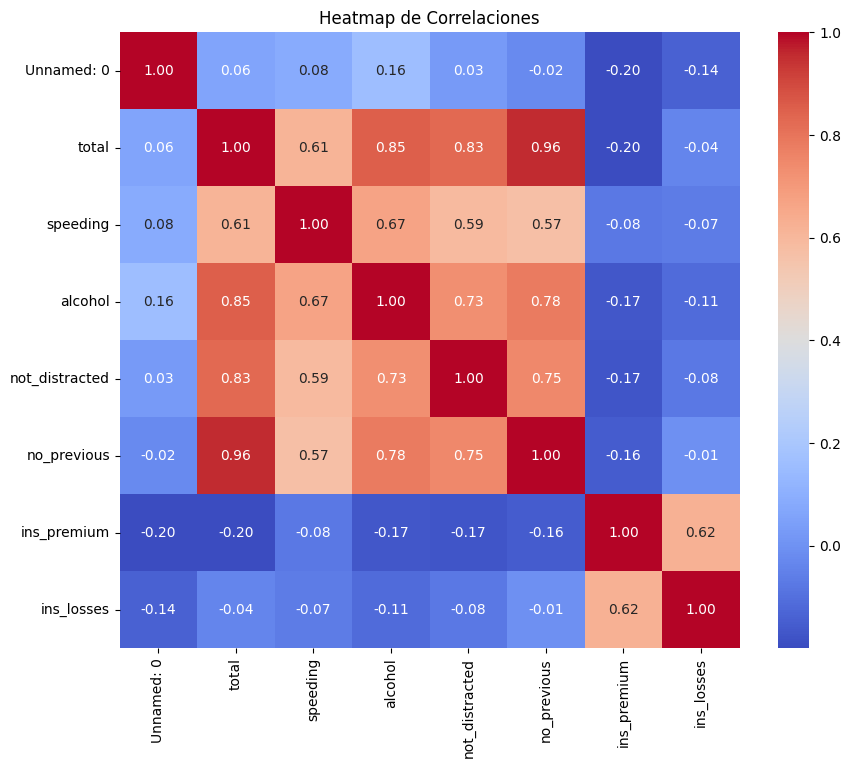

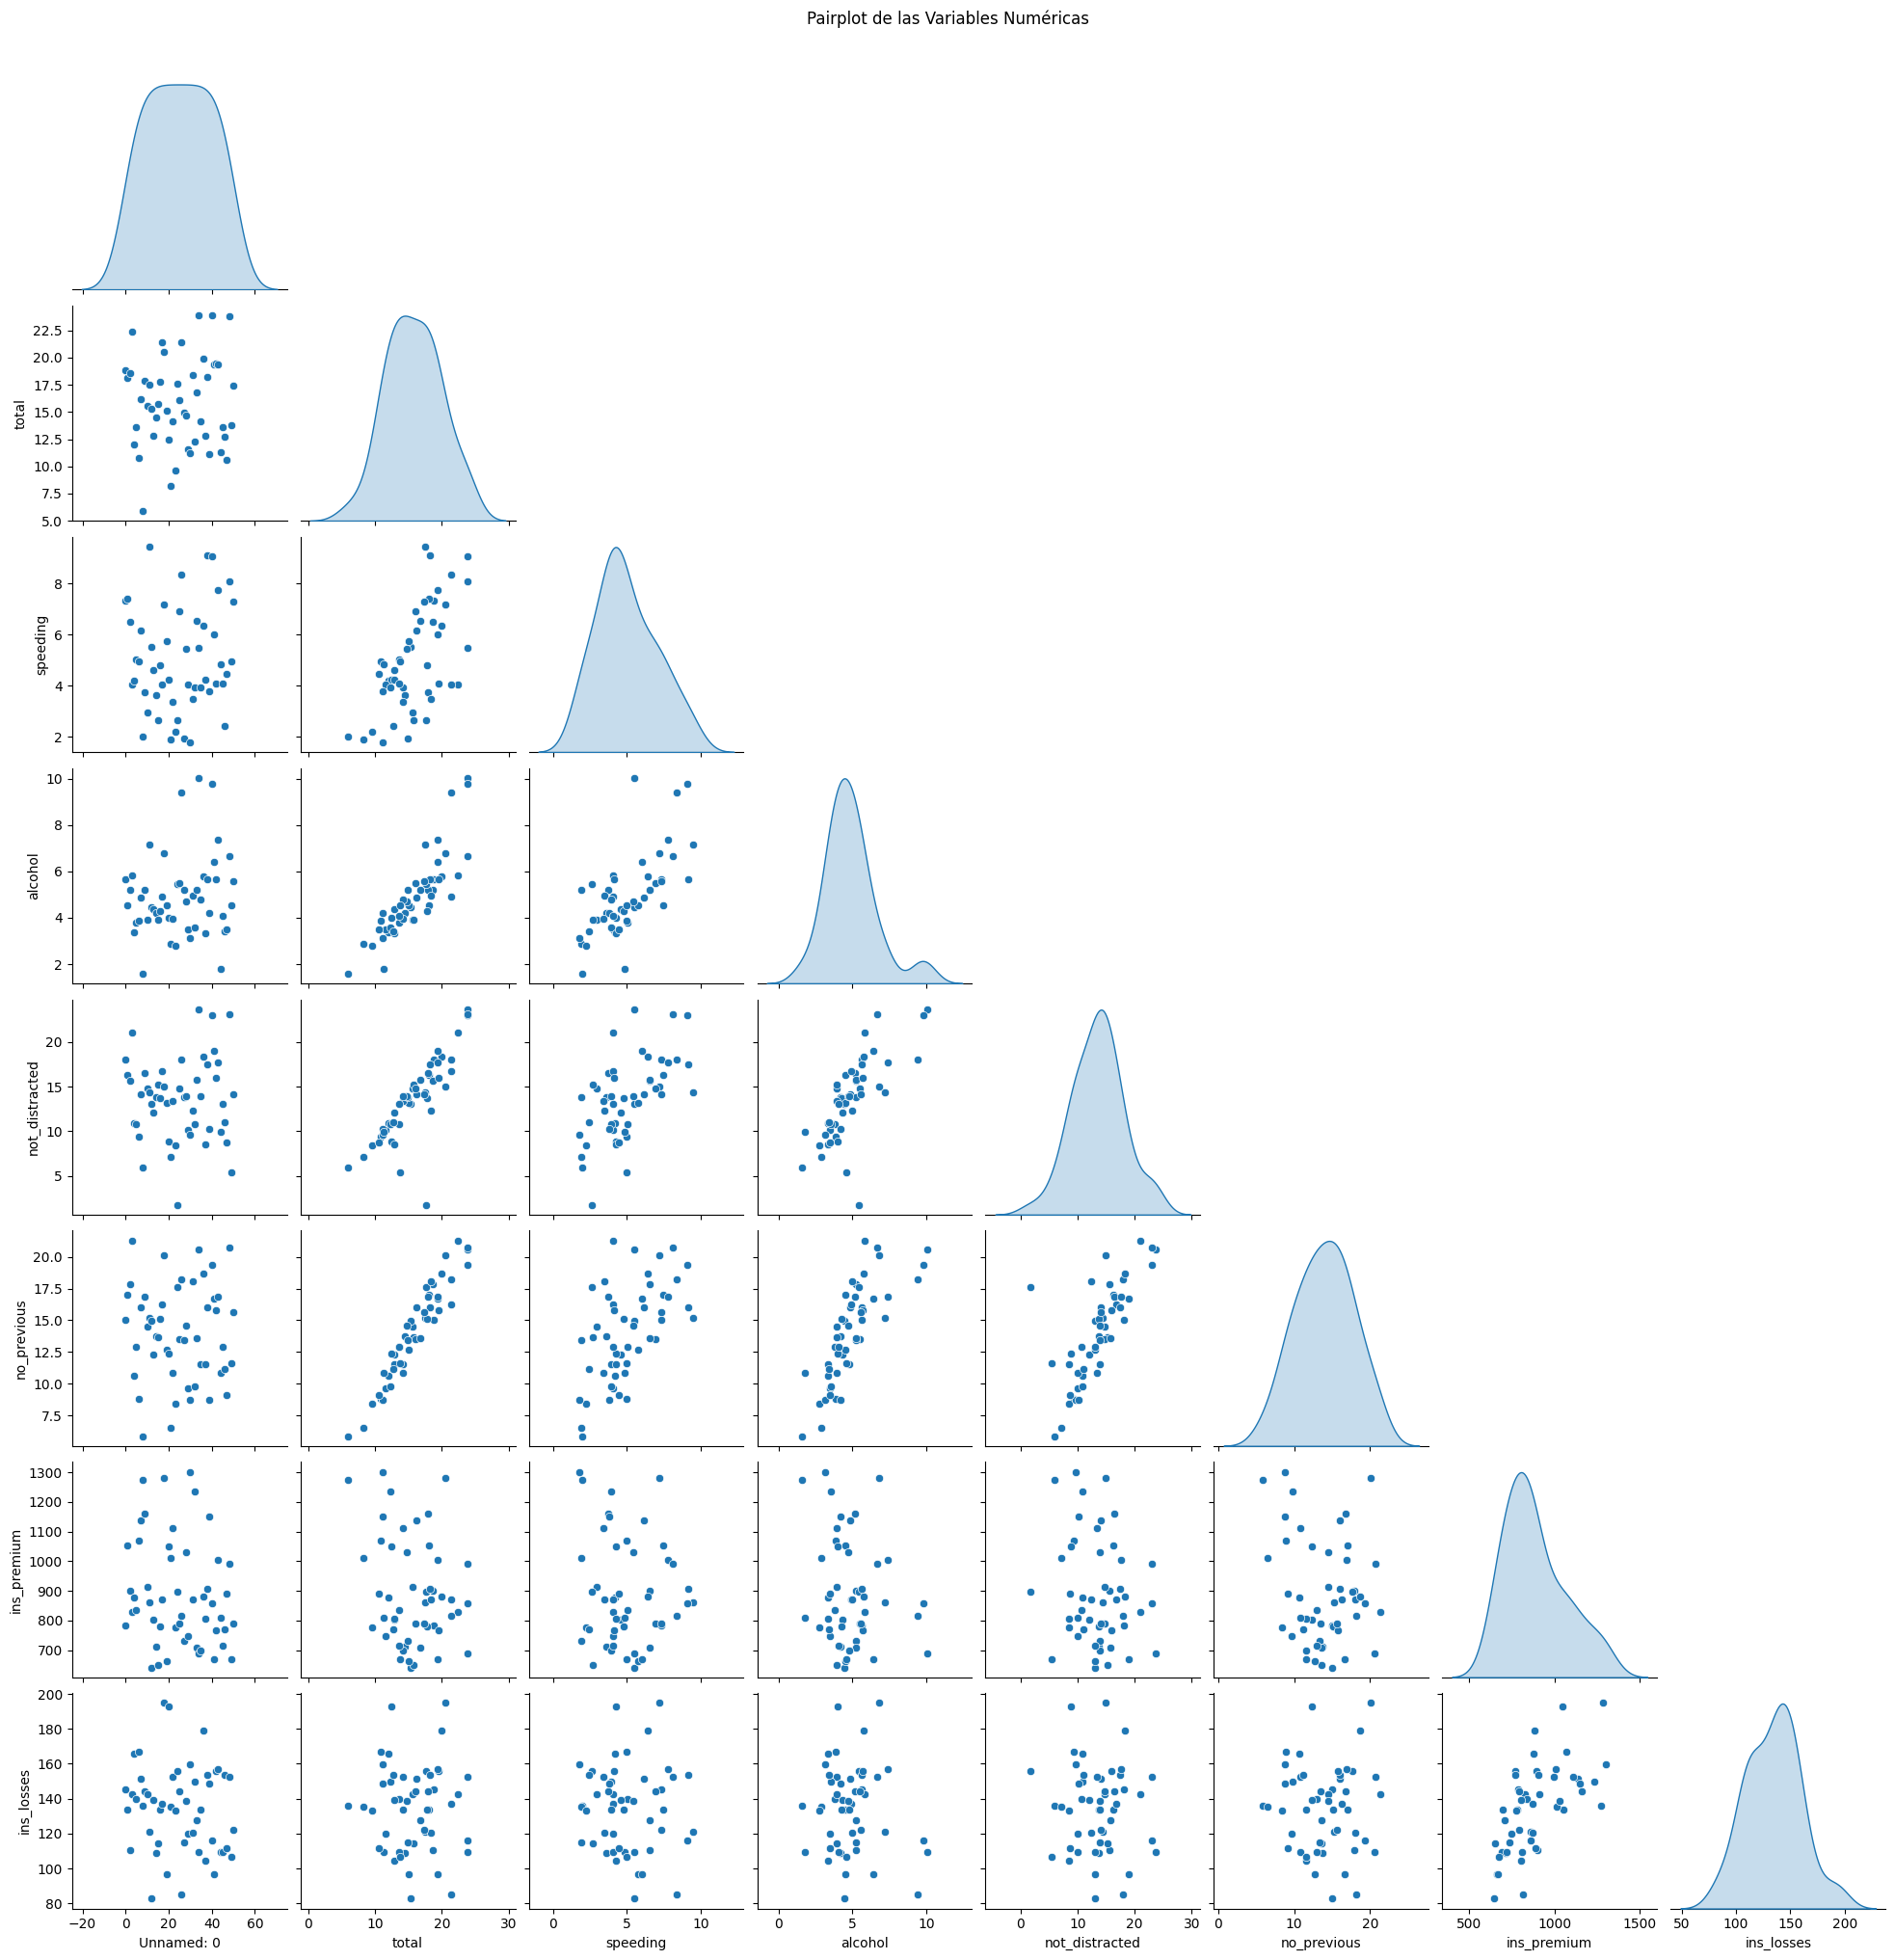

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset y corregir los encabezados
file_path = "./data/car_crashes.csv"
car_crashes_df = pd.read_csv(file_path, sep='|')

# Inspeccionar las columnas disponibles
print("Columnas disponibles en el dataset:")
print(car_crashes_df.columns)

# Asegurarse de que todas las columnas excepto 'state' sean numéricas
numerical_df = car_crashes_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numerical_df.corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)

# Mostrar las correlaciones con respecto a 'total', si existe en el dataset
if 'total' in correlation_matrix.columns:
    correlations_with_total = correlation_matrix['total'].sort_values(ascending=False)
    print("\nCorrelaciones con 'total':")
    print(correlations_with_total)
else:
    print("\nLa columna 'total' no está presente en la matriz de correlación.")

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap de Correlaciones")
plt.show()

# Crear un pairplot para visualizar las relaciones entre las variables numéricas
sns.pairplot(numerical_df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot de las Variables Numéricas", y=1.02)
plt.show()


### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

In [21]:
import pandas as pd

# Calcular la matriz de correlación para las variables seleccionadas
subset_df = car_crashes_df[['total', 'alcohol', 'speeding']]
correlation_matrix = subset_df.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
             total   alcohol  speeding
total     1.000000  0.852613  0.611548
alcohol   0.852613  1.000000  0.669719
speeding  0.611548  0.669719  1.000000


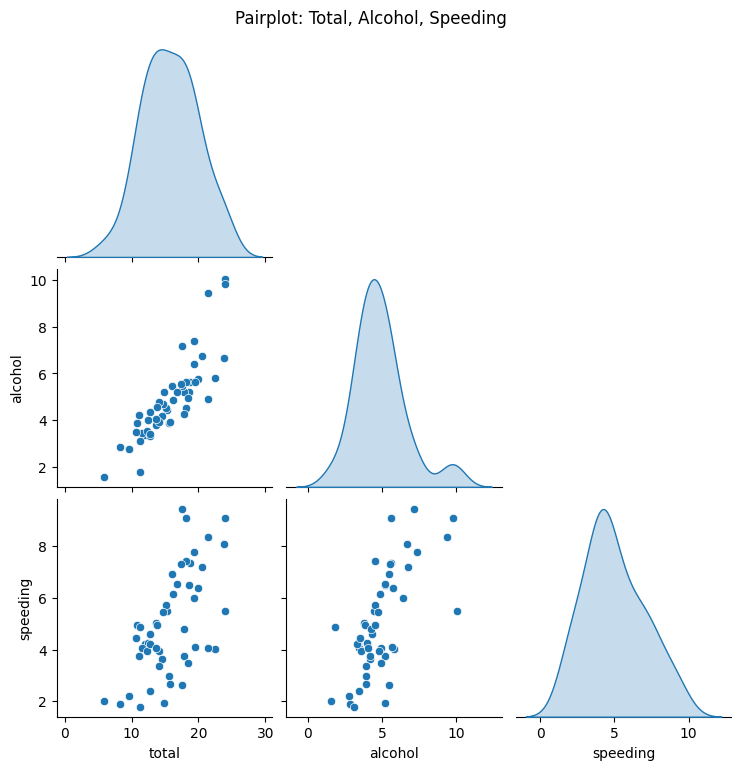

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un Pairplot para visualizar las relaciones
sns.pairplot(subset_df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot: Total, Alcohol, Speeding", y=1.02)
plt.show()


In [23]:
import statsmodels.api as sm

# Definir la variable dependiente (Y) y las independientes (X)
X = subset_df[['alcohol', 'speeding']]
y = subset_df['total']

# Añadir una constante a X (para el término independiente en la regresión)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           2.27e-14
Time:                        00:26:38   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6807      0.957      5.934      0.0